In [52]:
import numpy as np
import pandas as pd

In [53]:
dataset=pd.read_csv('train.csv')
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [54]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
nan_values=[feature for feature in dataset.columns if dataset[feature].isnull().sum() >1]

for feature in nan_values:
    print('{} = {} % of values are nan'.format(feature, np.round(dataset[feature].isnull().mean(), 4)))

Age = 0.1987 % of values are nan
Cabin = 0.771 % of values are nan
Embarked = 0.0022 % of values are nan


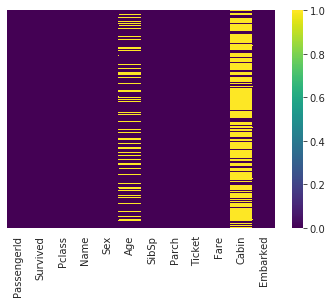

In [57]:
import seaborn as sns

sns.heatmap(dataset.isnull(), yticklabels=False, cmap='viridis')

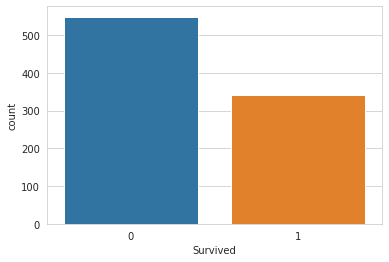

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=dataset)

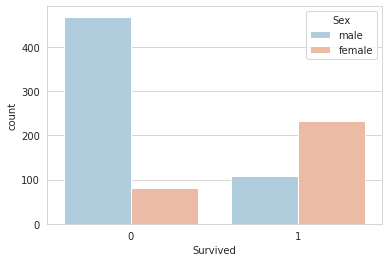

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=dataset, palette='RdBu_r')

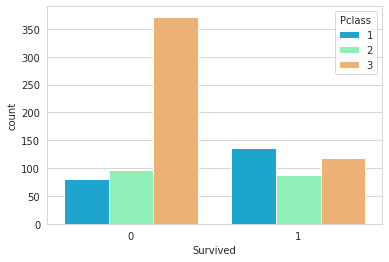

In [60]:
sns.countplot(x='Survived', hue='Pclass', data=dataset, palette='rainbow')

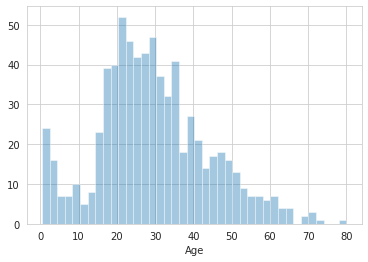

In [61]:
sns.distplot(dataset['Age'].dropna(), kde=False, bins=40)

#### Cleaning Data

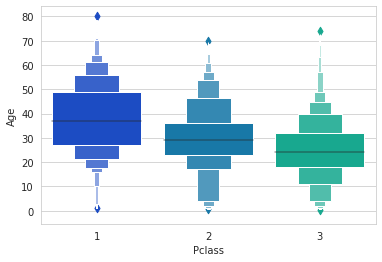

In [62]:
sns.boxenplot(x='Pclass', y='Age', data=dataset, palette='winter')

In [63]:
def for_cleaning(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [64]:
dataset['Age']=dataset[['Age', 'Pclass']].apply(for_cleaning, axis=1)

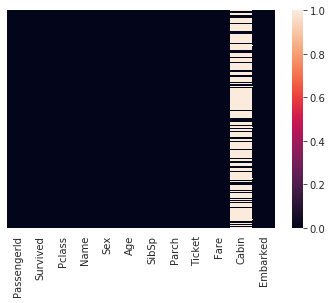

In [65]:
sns.heatmap(dataset.isnull(), yticklabels=False)

In [66]:
dataset.drop('Cabin', axis=1, inplace=True)

In [67]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
dataset.dropna(inplace=True)

In [69]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [70]:
## converting categorical feature to dummy feature other wise ML model will wont be get directly take in those
#feature as inpute 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [71]:
embarked= pd.get_dummies(dataset['Embarked'], drop_first=True)
sex= pd.get_dummies(dataset['Sex'], drop_first=True)


In [72]:
dataset.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [73]:
dataset=pd.concat([dataset, embarked, sex], axis=1)

In [74]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


#### Building a model

In [75]:
x=dataset.drop('Survived', axis=1)
y=dataset['Survived']

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=101)

In [77]:
from sklearn.linear_model import LogisticRegression


In [78]:
lsg=LogisticRegression()
lsg.fit(x_train, y_train)

/home/swapnil.pandit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
prediction=lsg.predict(x_test)


In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cnm=confusion_matrix(y_test, prediction)
accuracy=accuracy_score(y_test, prediction)

print(cnm)
print(accuracy)

[[148  15]
 [ 39  65]]
0.797752808988764
